In [3]:
import tensorflow as tf
import numpy as np
import torch
import torchvision as tv
from torchvision import transforms, datasets
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

In [4]:
# Grab MNIST dataset
training_set = datasets.MNIST('', train=True, download=False, transform=transforms.Compose([transforms.ToTensor()]))
testing_set = datasets.MNIST('', train=False, download=False, transform=transforms.Compose([transforms.ToTensor()]))
train = torch.utils.data.DataLoader(training_set, batch_size=50, shuffle=True)
test = torch.utils.data.DataLoader(testing_set, batch_size=50, shuffle=True)

In [5]:
# Shallow NN for training - 1 Hidden layer / 23860 - Parameters
class Shallow_Train_NN(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 30)
        self.fc2 = nn.Linear(30, 10)

    def forward(self, val):
        val = F.relu(self.fc1(val))
        val = self.fc2(val)
        return val

# Middle NN for training - 3 Hidden layer / 23893 Parameters
class middle_train_nn(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 25)
        self.fc2 = nn.Linear(25, 60)
        self.fc3 = nn.Linear(60, 38)
        self.fc4 = nn.Linear(38, 10)

    def forward(self, val):
        val = F.relu(self.fc1(val))
        val = F.relu(self.fc2(val))
        val = F.relu(self.fc3(val))
        val = self.fc4(val)
        return val
    
# Deep NN for simulation -  5 Hidden Layers / 23890 Parameters
class deep_Train_Nn(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 20)
        self.fc2 = nn.Linear(20, 40)
        self.fc3 = nn.Linear(40, 60)
        self.fc4 = nn.Linear(60, 50)        
        self.fc5 = nn.Linear(50, 30)
        self.fc6 = nn.Linear(30, 10)    
    
    def forward(self, val):
        val = F.relu(self.fc1(val))
        val = F.relu(self.fc2(val))
        val = F.relu(self.fc3(val))
        val = F.relu(self.fc4(val))
        val = F.relu(self.fc5(val))
        val = self.fc6(val)
        return val

In [6]:
# Set up necessary auxilaries for neural net training
shallow_nn = Shallow_Train_NN()
middlenn = middle_train_nn()
deepnn = deep_Train_Nn()
costFunc = nn.CrossEntropyLoss()
shallowOpt = optim.Adam(shallow_nn.parameters(), lr=0.001)
middleOpt = optim.Adam(middlenn.parameters(), lr=0.001)
deepOpt = optim.Adam(deepnn.parameters(), lr=0.001)

In [7]:
# Train shalllow networks, Calculate accuracy for training and testing in each epoch
EPOCHS = 100
counter = 0
counter_list = []
shallow_cost_list = []
shallowTestAccuracyList = []
shallowTrainAccuracyList = []
for index in range(EPOCHS):
    counter_list.append(counter)
    counter += 1
    print(counter)
    # Train model and keep track of loss
    for batch in train:
        input_images, groundTruth = batch
        shallow_nn.zero_grad()
        output = shallow_nn(input_images.view(-1,784))
        cost = costFunc(output, groundTruth)
        with torch.no_grad():
            c1 = costFunc(output, groundTruth)
        cost.backward()
        shallowOpt.step()
    shallow_cost_list.append(c1)
    
    # Calculate accuracy of shallow model on training data
    correct = 0
    total = 0
    with torch.no_grad():
        for batch in train:
            input_images, groundTruth = batch
            output = shallow_nn(input_images.view(-1,784))
            for i, outputTensor in enumerate(output):
                if torch.argmax(outputTensor) == groundTruth[i]:
                    correct += 1
                total += 1
    shallowTrainAccuracyList.append(round(correct/total, 3))

    # Calculate accuracy of shallow model on test data
    correct = 0
    total = 0
    with torch.no_grad():
        for batch in test:
            input_images, groundTruth = batch
            output = shallow_nn(input_images.view(-1,784))
            for i, outputTensor in enumerate(output):
                if torch.argmax(outputTensor) == groundTruth[i]:
                    correct += 1
                total += 1
    shallowTestAccuracyList.append(round(correct/total, 3))
    

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100


In [8]:
# Train middle neural networks, Calculate accuracy for training and testing in each epoch
middle_cost_list = []
middleTrainAccuracyList = []
middleTestAccuracyList = []
counter = 0
for index in range(EPOCHS):
    # Train model and keep track of loss
    counter += 1
    print(counter)
    for batch in train:
        input_images, groundTruth = batch
        middlenn.zero_grad()
        output = middlenn(input_images.view(-1,784))
        cost = costFunc(output, groundTruth)
        with torch.no_grad():
            c2 = costFunc(output, groundTruth)
        cost.backward()
        middleOpt.step()
    middle_cost_list.append(c2)
    
    # Calculate accuracy of middle nn on training data
    correct = 0
    total = 0
    with torch.no_grad():
        for batch in train:
            input_images, groundTruth = batch
            output = middlenn(input_images.view(-1,784))
            for i, outputTensor in enumerate(output):
                if torch.argmax(outputTensor) == groundTruth[i]:
                    correct += 1
                total += 1
    middleTrainAccuracyList.append(round(correct/total, 3))

    # Calculate accuracy of middle nn on test data
    correct = 0
    total = 0
    with torch.no_grad():
        for batch in test:
            input_images, groundTruth = batch
            output = middlenn(input_images.view(-1,784))
            for i, outputTensor in enumerate(output):
                if torch.argmax(outputTensor) == groundTruth[i]:
                    correct += 1
                total += 1
    middleTestAccuracyList.append(round(correct/total, 3)) 

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100


In [9]:
# Train Deep neural networks, Calculate accuracy for training and testing in each epoch
deepCostList = []
deepTrainAccuracyList = []
deep_test_accuracy_list = []
counter = 0
for index in range(EPOCHS):
    # Train model and keep track of loss
    counter += 1
    print(counter)
    for batch in train:
        input_images, groundTruth = batch
        deepnn.zero_grad()
        output = deepnn(input_images.view(-1,784))
        cost = costFunc(output, groundTruth)
        with torch.no_grad():
            c3 = costFunc(output, groundTruth)
        cost.backward()
        deepOpt.step()
    deepCostList.append(c3)
    
    # Calculate accuracy of deep nn on training data
    correct = 0
    total = 0
    with torch.no_grad():
        for batch in train:
            input_images, groundTruth = batch
            output = deepnn(input_images.view(-1,784))
            for i, outputTensor in enumerate(output):
                if torch.argmax(outputTensor) == groundTruth[i]:
                    correct += 1
                total += 1
    deepTrainAccuracyList.append(round(correct/total, 3))

    # Calculate accuracy of deep nn on test data
    correct = 0
    total = 0
    with torch.no_grad():
        for batch in test:
            input_images, groundTruth = batch
            output = deepnn(input_images.view(-1,784))
            for i, outputTensor in enumerate(output):
                if torch.argmax(outputTensor) == groundTruth[i]:
                    correct += 1
                total += 1
    deep_test_accuracy_list.append(round(correct/total, 3)) 

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100


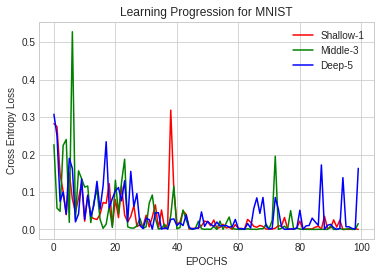

In [10]:
# Visulaize Training process of nn for MNIST dataset
plt.plot(counter_list, shallow_cost_list, 'r', label='Shallow-1')
plt.plot(counter_list, middle_cost_list, 'g', label='Middle-3')
plt.plot(counter_list, deepCostList, 'b', label='Deep-5')
plt.title("Learning Progression for MNIST")
plt.xlabel("EPOCHS")
plt.ylabel("Cross Entropy Loss")
plt.legend(loc="upper right")
plt.savefig("MNIST_Cost_SNN_MNN_DNN.jpg")
plt.show()

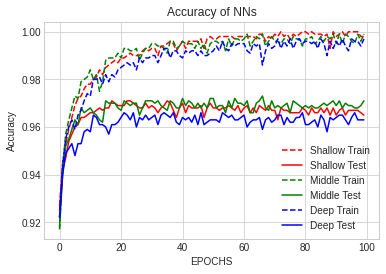

In [11]:
# Visulaize Accuracy of nn for for MNIST dataset
plt.plot(counter_list, shallowTrainAccuracyList, 'r--', label='Shallow Train')
plt.plot(counter_list, shallowTestAccuracyList, 'r', label='Shallow Test')
plt.plot(counter_list, middleTrainAccuracyList, 'g--', label='Middle Train')
plt.plot(counter_list, middleTestAccuracyList, 'g', label='Middle Test')
plt.plot(counter_list, deepTrainAccuracyList, 'b--', label='Deep Train')
plt.plot(counter_list, deep_test_accuracy_list, 'b', label='Deep Test')
plt.title("Accuracy of NNs")
plt.xlabel("EPOCHS")
plt.ylabel("Accuracy")
plt.legend(loc="lower right")
plt.savefig('Accuracy_of_DNN_SNN_MNN.jpg')
plt.show()